# Introducción

El dataset utilizado está basado en la medición de señales electromiográficas (EMG) para el control de una prótesis de mano [1]. Para la recolección, se empleó el MYO Armband que cuenta con 8 sensores EMG. Se capturaron 8 lecturas consecutivas por sensor, haciendo un total de 64 columnas de datos EMG. La grabación se realizó a una frecuencia de 200 Hz; es decir.
La información registrada corresponde a 4 diferentes gestos musculares para realizar acciones específicas de la prótesis. Estos gestos están inspirados en el juego “piedra, papel o tijera”, a los cuales se adiciona un cuarto gesto de “OK”, en donde el dedo índice y el dedo pulgar hace un agarre de tipo pinza. Los gestos están etiquetados como: 0 - piedra, 1 - tijeras, 2 - papel y 3 - Ok
Cada gesto fue grabado 6 veces por 20 segundos y se guardaron en csv separados por el gesto al que correspondían. Todos ellos grabados desde el mismo antebrazo derecho en un corto espacio de tiempo. Debido a que el algoritmo a implementar debe distinguir entre diferentes gestos de la mano a partir de señales EMG, esa data hace referencia a un Sistema de Clasificación supervisada.

Esta aplicación presenta gran relevancia porque, mediante algoritmos de reconocimiento de control y fuerza obtenidos por EMG, es posible ampliar la interacción de funcionalidades que puede tener el paciente con su prótesis. Lo cual, es un tema que se busca conseguir con el desarrollo de las prótesis; debido a que muchas de las prótesis mioeléctricas existentes solo limitan su funcionamiento a gestos como abrir y cerrar [2]. Además, el poder reconocer gestos a partir de sensores EMG de superficie genera grandes ventajas porque no es invasivo, no provoca molestias musculares y son fáciles de manejar; limitaciones que se presentan con el método de EMG invasivo [3].

Para comenzar, se importa "*kagglehub*" para poder obtener los 4 archivos .csv correspondientes a las **4 clases** por clasificar, a través de su "*file_path*".

In [17]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

for i in range(4):
  file_path = str(i)+".csv"
  if i == 0:
    df_0 = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "kyr7plus/emg-4",
      file_path,
    )
  elif i == 1:
    df_1 = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "kyr7plus/emg-4",
      file_path,
    )
  elif i == 2:
    df_2 = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "kyr7plus/emg-4",
      file_path,
    )
  elif i == 3:
    df_3 = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "kyr7plus/emg-4",
      file_path,
    )

<ipython-input-17-ef51471f4d71>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_0 = kagglehub.load_dataset(
<ipython-input-17-ef51471f4d71>:14: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_1 = kagglehub.load_dataset(
<ipython-input-17-ef51471f4d71>:20: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_2 = kagglehub.load_dataset(
<ipython-input-17-ef51471f4d71>:26: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_3 = kagglehub.load_dataset(


De acuerdo a cada data, se convierte en *dataframe* para poder examinar su información y obtener su número de filas y columnas.

Se emplea el "*df_X.values*" para considerar solo la data numérica que tiene la información y no los "*headers*".

In [18]:
data = df_0.values
df_0 = pd.DataFrame(data)

print(df_0.shape)
df_0.head()

(2909, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0.0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0.0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0.0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0.0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0.0


In [19]:
data = df_1.values
df_1 = pd.DataFrame(data)

print(df_1.shape)
df_1.head()

(2902, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1.0
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1.0
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1.0
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1.0
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1.0


In [20]:
data = df_2.values
df_2 = pd.DataFrame(data)

print(df_2.shape)
df_2.head()

(2942, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2.0
1,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2.0
2,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2.0
3,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2.0
4,3.0,-3.0,-6.0,-5.0,-3.0,-4.0,-5.0,-4.0,-5.0,8.0,...,-18.0,-14.0,8.0,1.0,-2.0,-4.0,-34.0,-3.0,6.0,2.0


In [21]:
data = df_3.values
df_3 = pd.DataFrame(data)

print(df_3.shape)
df_3.head()

(2921, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3.0
1,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3.0
2,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3.0
3,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3.0
4,-11.0,-2.0,-5.0,1.0,-7.0,-11.0,-4.0,-23.0,-9.0,0.0,...,-4.0,9.0,1.0,2.0,8.0,21.0,41.0,15.0,9.0,3.0


Se obtienen sus dimensiones donde hay 2909 filas de clase '0', 2902 filas de clase '1', 2942 filas de clase '2' y 2921 filas de clase '3'. Además, hay 65 columnas donde 64 son de información de los sensores y 1 es el **output**.

Procedemos a concatenar la data donde se obtiene **11674** filas y 65 columnas.

In [22]:
DataBase = pd.concat([df_0, df_1, df_2, df_3])
DataBase.head()
print(DataBase.shape)

(11674, 65)


Se convierte la data de tipo "float" a data "int" de la última columna, es decir, el output que representa el tipo de clase (o gesto).

In [23]:
DataBase[64] = DataBase.iloc[:][64].astype(int)
DataBase.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


Ahora que se tiene los dataframes, se plotean para poder observar el comportamiento de la información.

<Axes: >

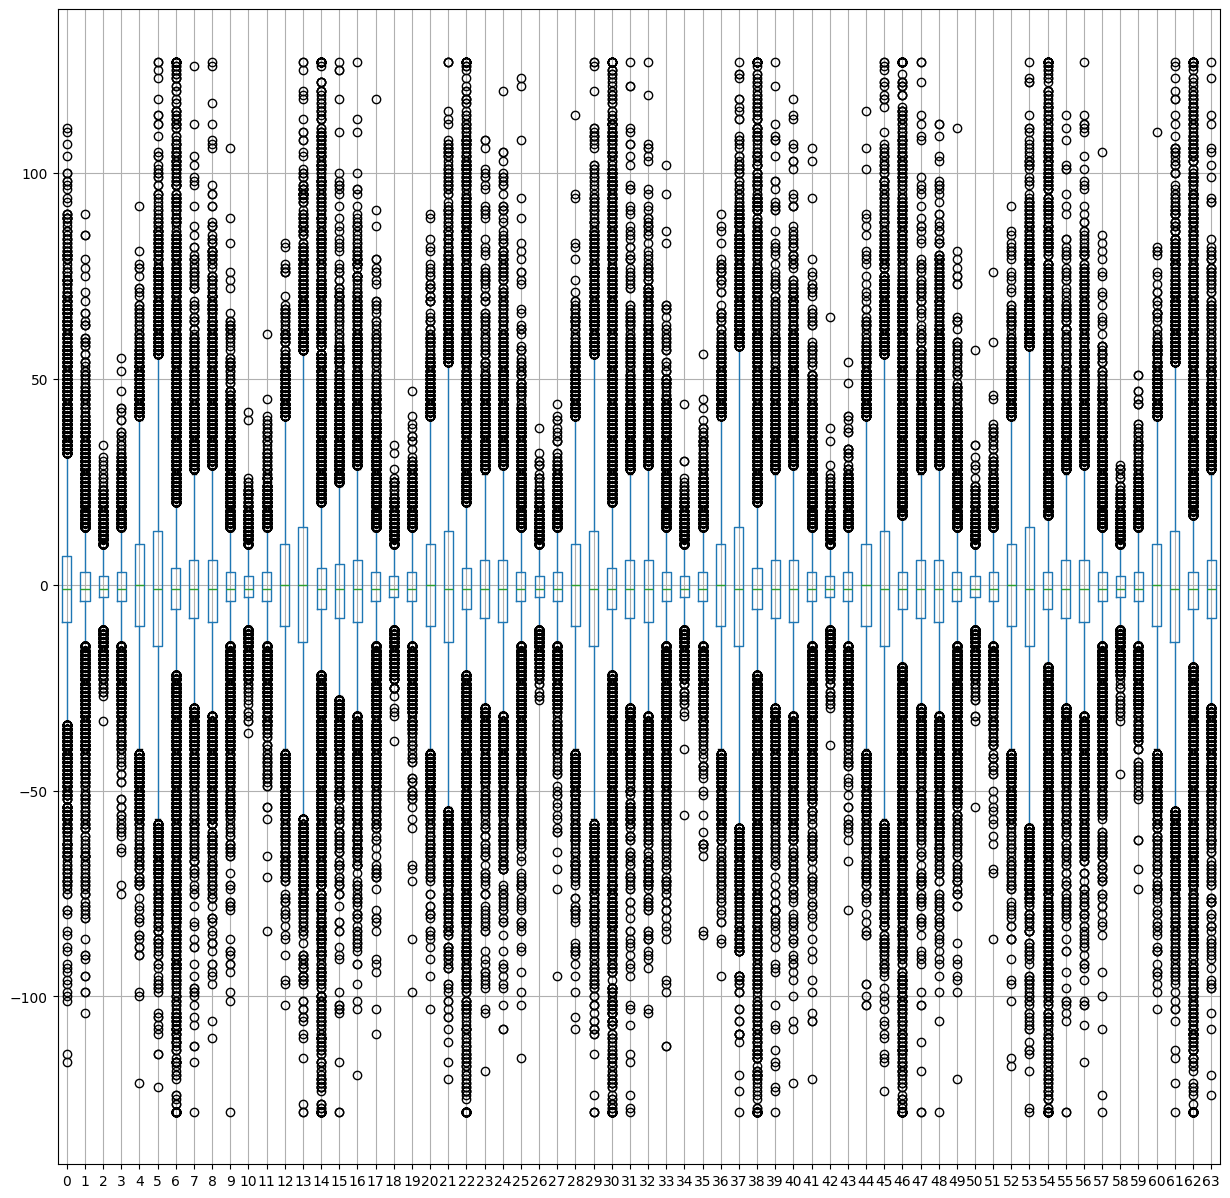

In [24]:
X = DataBase.drop(columns=[64])
y = DataBase[64]

X.boxplot(figsize=(15,15))

Para poder tener los datos en una misma escala se considera aplicar estandarización con "*StandardScaler*" al ser un tipo de data estructurada.

<Axes: >

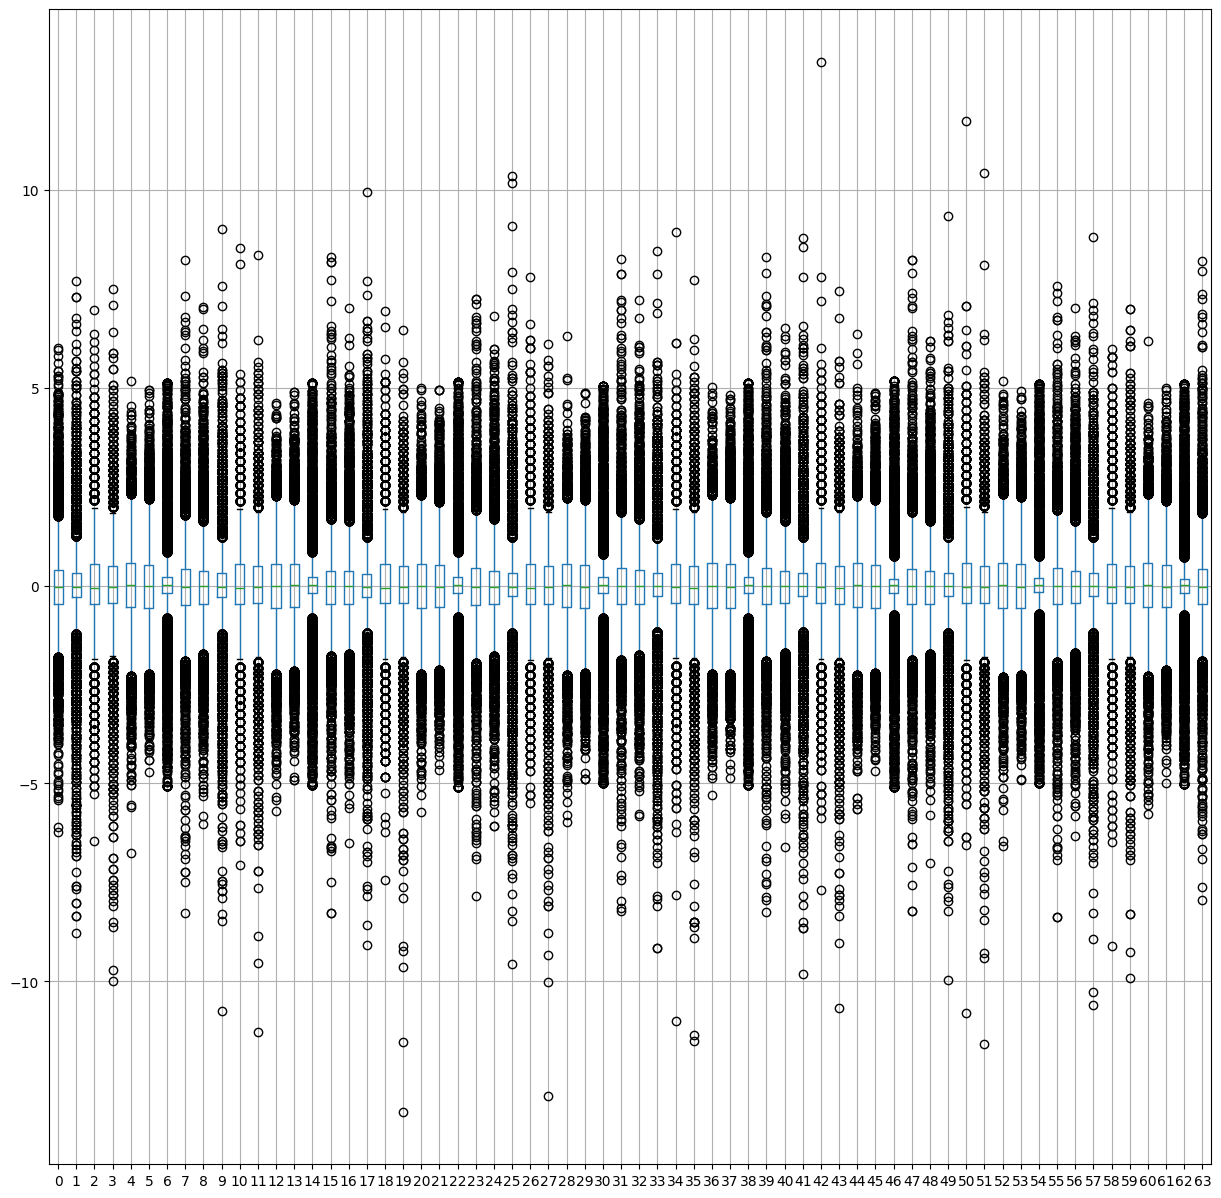

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.boxplot(figsize=(15,15))

Después de la etapa de preprocesamiento, se opta por dividir la data para entrenar y testear el modelo a través de "*train_test_split*" con un 80% de data de entrenamiento y **20% de data de testeo**.

De igual forma, nos interesó saber como se administró los datos y quisimos observar la dimensionalidad de cada uno.

In [27]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#X_train.head()

(9339, 64)
(9339,)
(2335, 64)
(2335,)


# Modelo de Decision Tree

En este apartado, se consideró los hiperparámetros 'criterion', 'max_depth', 'min_samples_split' y 'min_samples_leaf', con un GridSearchCV de CV=5 para considerar los mejores parámetros para sus resultados.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [29]:
dtree = DecisionTreeClassifier(random_state=42)

# Hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
CV_dtree.fit(X_train, y_train)

print("Best parameters found for Decision Tree:", CV_dtree.best_params_)

best_dtree = CV_dtree.best_estimator_

y_pred = best_dtree.predict(X_test)

report = classification_report(y_test, y_pred, digits=2)
print(report)

Best parameters found for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       588
           1       0.80      0.84      0.82       605
           2       0.77      0.78      0.77       543
           3       0.75      0.70      0.72       599

    accuracy                           0.80      2335
   macro avg       0.80      0.80      0.80      2335
weighted avg       0.80      0.80      0.80      2335



# Modelo Random Forest + Hiperparámetros

En este apartado, se consideran los hiperparámetros de 'n_estimators' y 'max_depth' al ser las más comunes en variar. Asimismo, se aplica un GridSearchCV de CV=5 para considerar los mejores parámetros para sus resultados, y un scoring de "f1_macro" que es el parámetro que evalúa cuál modelo del GridSearchCV fue mejor.

Se opta por visualizar los resultados a través de un confusion_matrix

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       588
           1       0.94      0.92      0.93       605
           2       0.90      0.94      0.92       543
           3       0.90      0.83      0.86       599

    accuracy                           0.91      2335
   macro avg       0.91      0.91      0.91      2335
weighted avg       0.91      0.91      0.91      2335



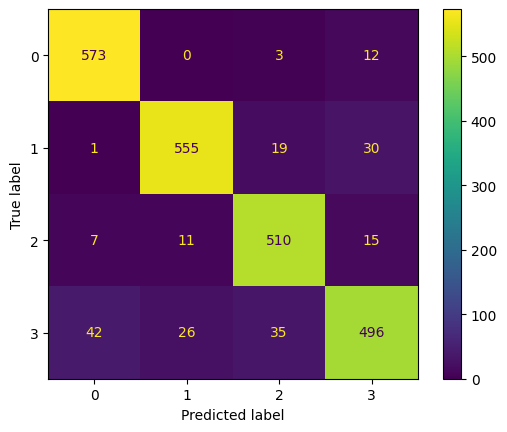

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

parameters = {'n_estimators':[10, 50, 100], 'max_depth':[None, 6, 8, 10, 20]}
forest = RandomForestClassifier(random_state=42)
clf = GridSearchCV(forest, parameters,cv = 5, scoring="f1_macro")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

De acuerdo con GridSearchCV, los mejores parámetros que arrojan el modelo con mejor resultado es 'max_depth' de **20** y 'n_estimators' de **100**.

In [32]:
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 100}


Hemos realizado iteraciones para ver cómo afecta la **variación del hiperparámetro 'n_estimators' con 10, 50 y 100**, en el comportamiento del modelo y los valores de F1_score.

En este caso, el valor de **'n_estimators' = 100** es el que mejores resultados arroja.

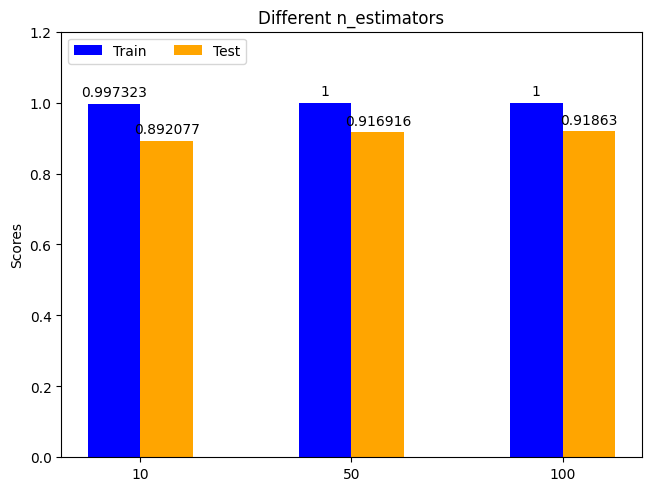

{10: [0.9973230538601563, 0.8920770877944325], 50: [1.0, 0.9169164882226981], 100: [1.0, 0.9186295503211992]}


In [33]:
import numpy as np
values=[]
for i in range(len(parameters["n_estimators"])):
  forest = RandomForestClassifier(n_estimators=parameters["n_estimators"][i], random_state=42)
  forest.fit(X_train, y_train)
  train_f1 = f1_score(y_train, forest.predict(X_train), average='micro')
  test_f1 = f1_score(y_test, forest.predict(X_test), average='micro')
  values.append([train_f1, test_f1])

dict_values = (10, 50, 100)
my_dictionary = dict(zip(dict_values, values))

x = np.arange(len(my_dictionary))
width = 0.25

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(my_dictionary.items()):
    best_score, test  = measurement[0], measurement[1]
    rects1 = ax.bar(x[i] - width/2, best_score, width, label='Train' if i == 0 else None, color = "blue")
    rects2 = ax.bar(x[i] + width/2, test, width, label='Test' if i == 0 else None, color = "orange")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

ax.set_ylabel('Scores')
ax.set_title('Different n_estimators')
ax.set_xticks(x, dict_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()
print(my_dictionary)

Por último, vimos cómo afecta la **variación del hiperparámetro 'max_depth' con None, 6, 8, 10 y 20**, en el comportamiento del modelo y los valores de F1_score.

Y por consiguiente, se obtiene que con **'max_depth' = None** arroja mejores resultados.

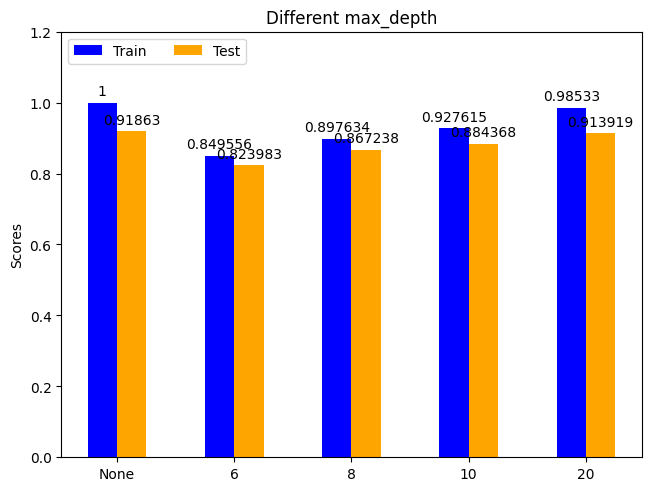

{'None': [1.0, 0.9186295503211992], 6: [0.8495556269407859, 0.823982869379015], 8: [0.8976335796123782, 0.867237687366167], 10: [0.9276153763786272, 0.8843683083511777], 20: [0.9853303351536568, 0.9139186295503212]}


In [34]:
values=[]
for i in range(len(parameters["max_depth"])):
  forest = RandomForestClassifier(max_depth=parameters["max_depth"][i], random_state = 42)
  forest.fit(X_train, y_train)
  train_f1 = f1_score(y_train, forest.predict(X_train), average='micro')
  test_f1 = f1_score(y_test, forest.predict(X_test), average='micro')
  values.append([train_f1, test_f1])

dict_values = ("None", 6, 8, 10, 20)
my_dictionary = dict(zip(dict_values, values))

x = np.arange(len(my_dictionary))
width = 0.25

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(my_dictionary.items()):
    best_score, test  = measurement[0], measurement[1]
    rects1 = ax.bar(x[i] - width/2, best_score, width, label='Train' if i == 0 else None, color = "blue")
    rects2 = ax.bar(x[i] + width/2, test, width, label='Test' if i == 0 else None, color = "orange")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

ax.set_ylabel('Scores')
ax.set_title('Different max_depth')
ax.set_xticks(x, dict_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()
print(my_dictionary)

# Discusión y conclusiones

Comparando las métricas obtenidas por el modelo de Árbol de Decisión y un Random Forest sobre el Dataset de señales EMG de cuatro gestos diferentes. Ambos modelos los optimizamos mediante hiperparámetros usando GridSearchCV, y evaluando las métricas estandares para estos tipos de modelos: precision, recall, f1-score y accuracy.

El modelo de Árbol de Decisión alcanzó un accuracy de 80% y un f1 promedio de 0.80, el modelo de Random Forest logró un accuracy de 91% y un f1 de 0.91. Mostrando asi al utilizar el modelo de Random Forest podemos ver una mejora , evidenciando su capacidad para generalizar mejor sobre nuevos datos. Igual que se puede ver en estudios que destacan el Random Forest en clasificación de datos biomédicos al manejar estructuras complejas y espacios de alta dimensionalidad [4].

La diferencia que se ve puede notar es que en el Árbol de Decisión puede tener *overfitting* y el Random Forest al ser un conjunto de árboles independientes, reduce el error de generalización combinando resultados de múltiples árboles y aplicando técnicas como el muestreo *bootstrap* y selección aleatoria de variables en cada división [5]. Y también optimizar los modelos variando lo hiperparametros como *n_estimators* y *max_depth* permitió mejorar el rendimiento del modelo.

Por otro lado, estudios en clasificación de señales EMG han demostrado que el uso de técnicas adicionales de preprocesamiento y extracción de características, como las descomposiciones wavelet combinada con Random Forest, logra tasas de clasificación superiores al 96% [4]. Algo que podemos aumentar en un futuro trabajo.

Bibliografía:

[1] Kirill Yashuk, “Classify gestures by reading muscle activity.,” Kaggle.com, 2018. Available: https://www.kaggle.com/datasets/kyr7plus/emg-4/data. [Accessed: Apr. 28, 2025]

‌[2] M. Atzori et al., “Electromyography data for non-invasive naturally-controlled robotic hand prostheses,” Scientific Data, vol. 1, no. 1, Dec. 2014, doi: https://doi.org/10.1038/sdata.2014.53. Available: https://www.nature.com/articles/sdata201453. [Accessed: Apr. 28, 2025]

[3] E. Guzmán-Muñoz and G. Méndez-Rebolledo, “Electromiografía en las Ciencias de la Rehabilitación Electromyography in the Rehabilitation Sciences,” Barranquilla (Col, vol. 34, no. 3, pp. 753–765, 2018, Available: http://www.scielo.org.co/pdf/sun/v34n3/2011-7531-sun-34-03-753.pdf

[4] E. Gokgoz and A. Subasi, "Comparison of decision tree algorithms for EMG signal classification using DWT," Biomedical Signal Processing and Control, vol. 18, pp. 138–144, 2015.

[5] P. T. R., "A Comparative Study on Decision Tree and Random Forest Using R Tool," International Journal of Advanced Research in Computer and Communication Engineering, vol. 4, no. 1, pp. 196–199, 2015.